In [2]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'
%run 'mask_galaxies.ipynb'

In [63]:
machine='chinook'

### STUFF WE MUST HAVE:
slicewidth = 5.        # initial value
resolution = None      # initial value   # arcsec/pixel
distance   = '100Mpc'  # initial value
data_FOV =None  # from extract_FOV
xystarts =None  # from extract_FOV
size     =None  # from extract_FOV

data_tuple = loaddata(machine=machine, distance=distance, slicewidth=slicewidth)  ### I want this to set the resolution too

Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 100Mpc is 6.40094057981.
Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_100Mpc_6arcsec_5slwd.npz exists, loading now...
./intermediatedata/data_100Mpc_6arcsec_5slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,6.40094057981 appended.


In [64]:
data = data_tuple[0]
resolution = data_tuple[3]
print data.shape
print resolution

(32000, 32000)
6.40094057981


In [65]:
FOV1_50, xystarts1_50, size1_50    = extractFOV(data_tuple,  resolution, '50Mpc', x_center = 50.5, y_center = 13.5)
FOV1_100, xystarts1_100, size1_100 = extractFOV(data_tuple,  resolution, '100Mpc', x_center = 50.5, y_center = 13.5)
FOV1_200, xystarts1_200, size1_200 = extractFOV(data_tuple,  resolution, '200Mpc', x_center = 50.5, y_center = 13.5)
FOV1_500, xystarts1_500, size1_500 = extractFOV(data_tuple,  resolution, '500Mpc', x_center = 50.5, y_center = 13.5)


In [66]:
def plotcutout(data,minx,miny,size):
    shape = data.shape[0]
    data_cutout = data[int(minx/100.*shape):int((minx+size)/100.*shape),int(miny/100.*shape):int((miny+size)/100.*shape)]
    return data_cutout

def plotbox(minx,miny,sizex,sizey,ax,colour='black'):
    ax.plot([minx,minx+sizex,minx+sizex,minx,minx],[miny,miny,miny+sizey,miny+sizey,miny],color=colour,linewidth=1)

In [67]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


The type of size is <type 'int'>
The type of size is <type 'int'>


(4.71875, 22.28125)

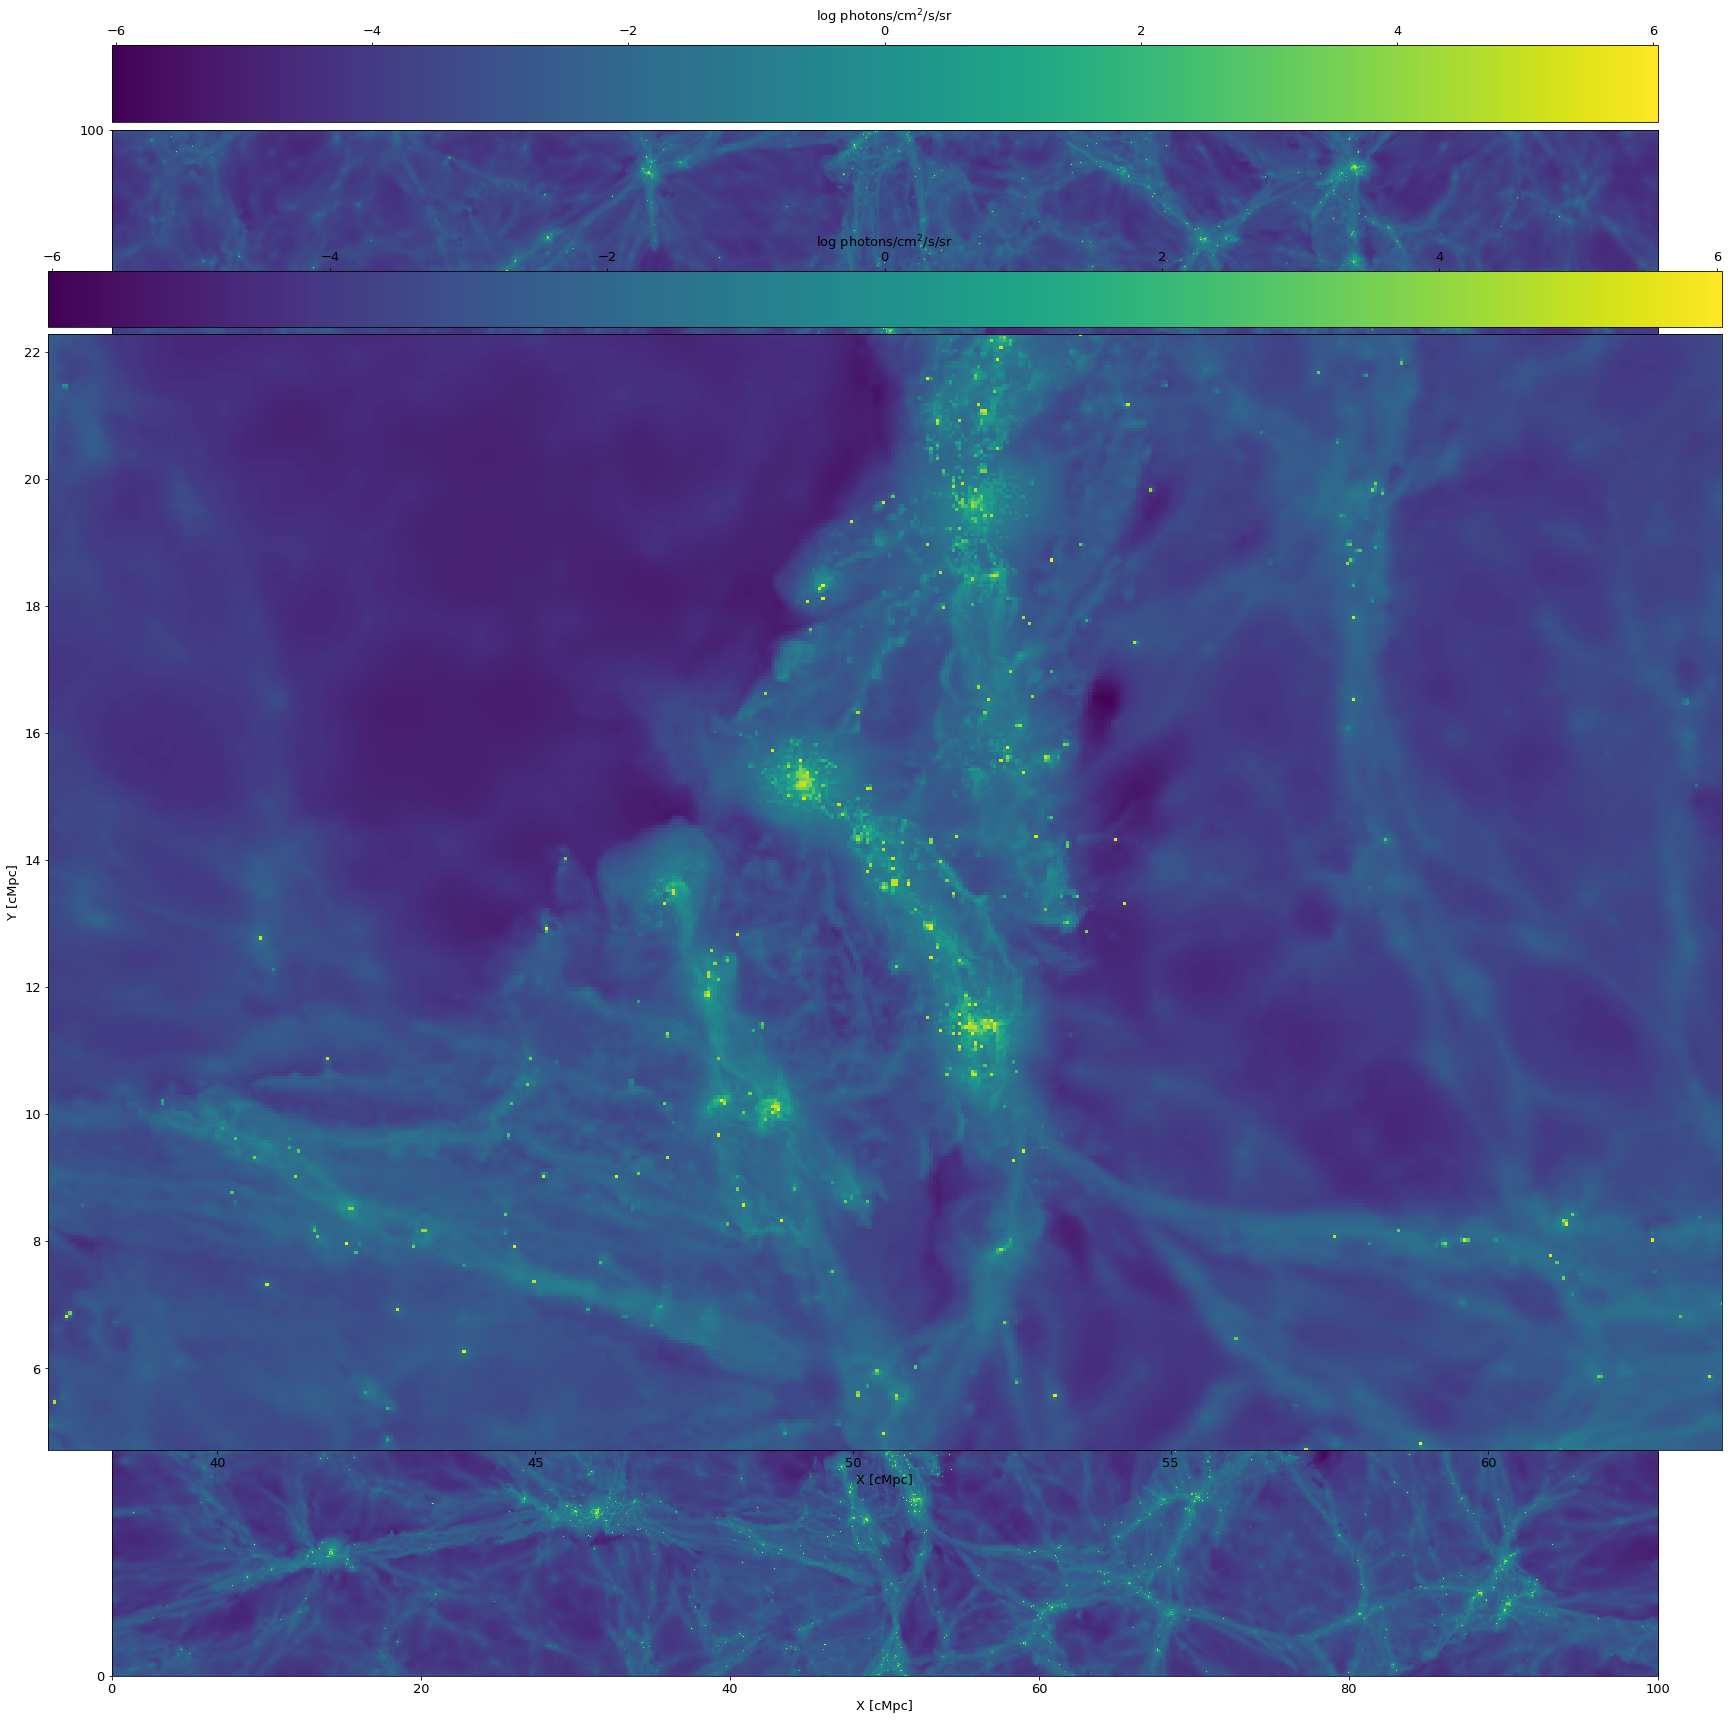

In [96]:
fig, (ax1) = plt.subplots(1, 1, figsize=(30, 30))
get_halpha_SB.makemap(data_tuple_5[0],100,ax1,xystarts = [0,0])
#plotbox(xystarts1_50[0],xystarts1_50[1],size1_50[0],size1_50[1],ax1)
#plotbox(xystarts1_100[0],xystarts1_100[1],size1_100[0],size1_100[1],ax1)
#plotbox(xystarts1_200[0],xystarts1_200[1],size1_200[0],size1_200[1],ax1)
#plotbox(xystarts1_500[0],xystarts1_500[1],size1_500[0],size1_500[1],ax1)

axins = zoomed_inset_axes(ax1, 2, loc=1) 
#get_halpha_SB.makemap(data[xystarts1_500[0]:xystarts1_500[0]+size1_500[0],xystarts1_500[1]:xystarts1_500[1]+size1_500[1]],size1_500,ax1,xystarts = xystarts1_500)
get_halpha_SB.makemap(data_tuple_5[0],100,axins,xystarts = [0,0])

x1, x2, y1, y2 = xystarts1_500[0], xystarts1_500[0]+size1_500[0], xystarts1_500[1], xystarts1_500[1]+size1_500[1] # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2)

#plt.tight_layout()

The type of size is <type 'list'>


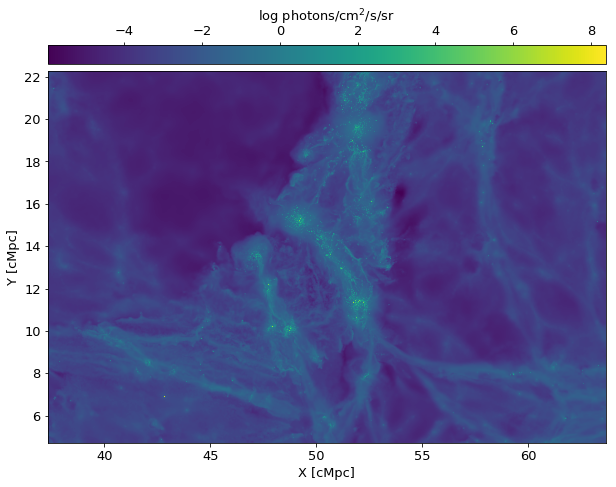

In [69]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)


In [72]:
%run 'mask_galaxies.ipynb'

In [74]:
verbose=True
xmin,xmax,ymin,ymax,zmin,zmax = xystarts1_500[0],xystarts1_500[0]+size1_500[0],xystarts1_500[1],xystarts1_500[1]+size1_500[1],10.,15.
xgal,ygal,zgal,mgal,rhgas,rhstar = searchgals(xmin,xmax,ymin,ymax,zmin,zmax,True,False) # from mask_galaxies

SELECT                 SH.GalaxyID,                 SH.StarFormationRate as SFR,                 SH.CentreOfPotential_x,                 SH.CentreOfPotential_y,                 SH.CentreOfPotential_z,                 SH.SubGroupNumber,                 SH.MassType_Star,                 SH.HalfMassProjRad_Gas,                 SH.HalfMassProjRad_Star             FROM                 RefL0100N1504_SubHalo as SH             WHERE                 SH.SnapNum = 28 and                 SH.CentreOfPotential_x >= 37.328125 and                 SH.CentreOfPotential_x <= 63.671875 and                 SH.CentreOfPotential_y >= 4.71875 and                 SH.CentreOfPotential_y <= 22.28125 and                 SH.CentreOfPotential_z >= 10.0 and                 SH.CentreOfPotential_z <= 15.0 and                 SH.MassType_Star > 0 


37.328125 63.671875 4.71875 22.28125 10.0 15.0


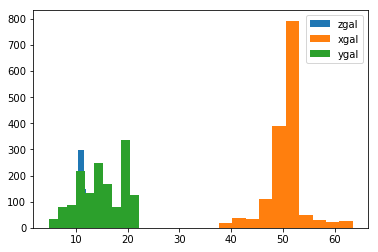

In [75]:
plt.hist(zgal,label='zgal')
plt.hist(xgal,label='xgal')
plt.hist(ygal,label='ygal')
plt.legend()

print xmin,xmax,ymin,ymax,zmin,zmax

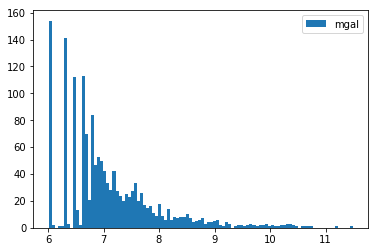

In [81]:
plt.hist(np.log10(mgal),label='mgal',bins=100);
plt.legend()

In [82]:
#Mpcperpix = 0.237/1000.*(1.+0.0115) * resolution
Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution

# Condition (use bitwise "&" and not boolean "and")
condition_8to9 = np.array(   
                              (mgal > 10**8) & (mgal < 10**9)
                         )
condition_9to10 = np.array(  
                               (mgal > 10**9) & (mgal < 10**10)
                          )
condition_10andup = np.array(    
                                 (mgal > 10**10) 
                            )
ii_8to9 = np.array(np.where(condition_8to9)[0]) 
ii_9to10 = np.array(np.where(condition_9to10)[0]) 
ii_10andup = np.array(np.where(condition_10andup)[0]) 

In [83]:
print len(ii_8to9), len(ii_9to10), len(ii_10andup)
xgal_10andup     = np.array(xgal[ii_10andup])
ygal_10andup     = np.array(ygal[ii_10andup])
mgal_10andup     = np.array(mgal[ii_10andup])
rhstar_10andup   = np.array(rhstar[ii_10andup])
sfr_10andup      = np.array(sfr[ii_10andup])
len(ygal_10andup)

134 39 23


23

In [84]:
len(xgal)

1505

The type of size is <type 'list'>


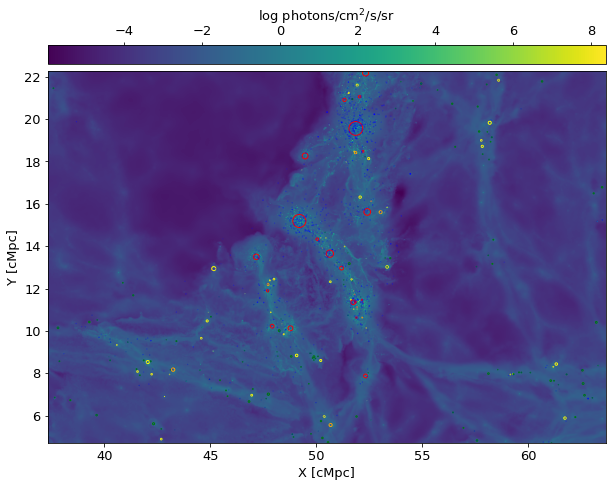

In [85]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 10))
get_halpha_SB.makemap(FOV1_500,size1_500,ax1,xystarts = xystarts1_500)

def plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose):
    for i in range(len(xgal)):
        colour = 'green'
        if mgal[i]>10**8:
            colour = 'yellow'
        if mgal[i]>10**9:
            colour = 'orange'
        if mgal[i]>10**10:
            colour = 'red'
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhgas[i]/1000., color=colour,fill=False)
        ax1.add_artist(circle1)
        circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000., color='blue',fill=False)
        ax1.add_artist(circle1)
       # if verbose:
       #     Mpcperpix = 0.237/1000.*(1.+0.0115) * 100.
       #     Mpcperpix = 0.477/1000.*(1.+0.0235) * resolution 
       #     if (rhstar[i]*5.) > (Mpcperpix*1000.) and (rhgas[i]*5.) > (Mpcperpix*1000.):
       #         print("5*rhstar, %.1f, is greater than %s kpc, and has galaxy mass of %s, and a 5*rhgas of %.1f."%\
       #               ((rhstar[i]*5.),(Mpcperpix*1000.),mgal[i],(rhgas[i]*5.)))
       #         circle1 = plt.Circle((xgal[i],ygal[i]), radius=rhstar[i]/1000.*5., color='purple',fill=False)
       #         ax1.add_artist(circle1)

plotgals(xgal,ygal,rhgas,rhstar,mgal,ax1,verbose)

In [86]:
def pltimg(data_FOV,ax,xystarts,size,label=None,colmap = 'viridis'):
    ax.patch.set_facecolor(cm.get_cmap(colmap)(0.)) # sets background color to lowest color map value
    img = ax.imshow(data_FOV.T,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]),\
                    origin='lower', cmap=cm.get_cmap(colmap),interpolation='nearest')
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("top",size="5%",pad=0.1)
    cbar = plt.colorbar(img, cax=cax,orientation='horizontal')
    if label is not None:
        ax.text(0.0,0.9,label,transform=ax.transAxes,color='white')


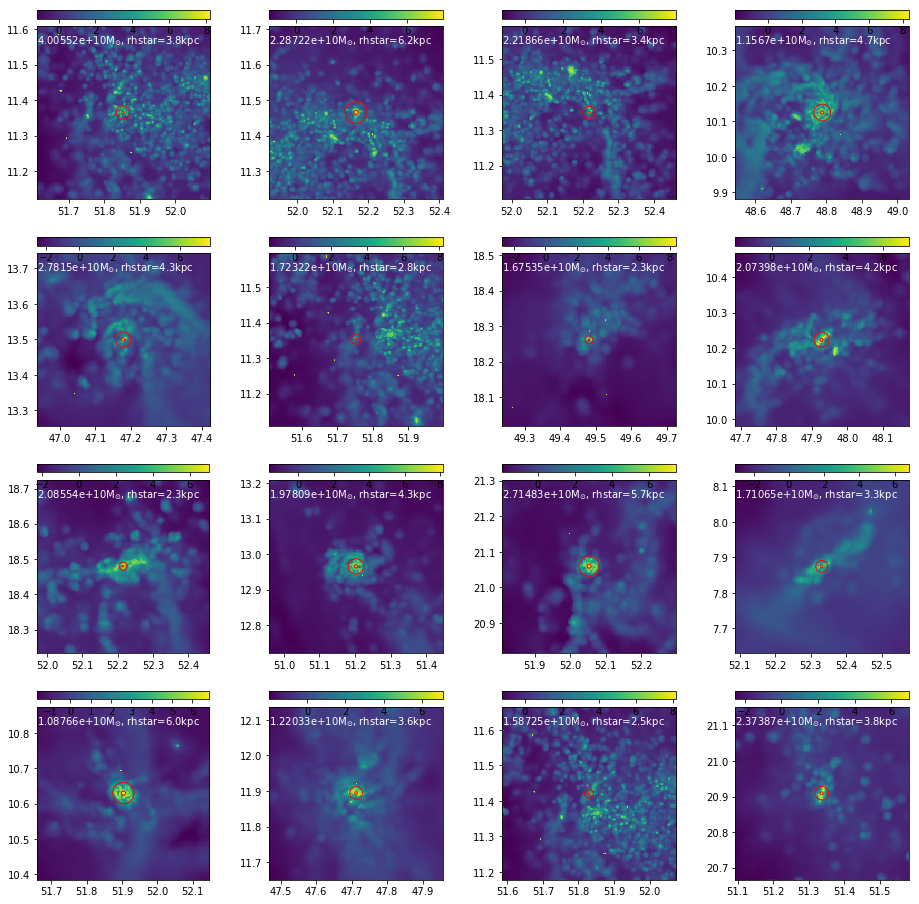

In [87]:
f, axarr = plt.subplots(4, 4,figsize=(16,16))

for j in range(16):
    data_tiny, xystarts_tiny, size_tiny = extractFOV(data_tuple,resolution,distance,\
                                                     x_center=xgal_10andup[j],y_center=ygal_10andup[j],\
                                                     x_angFOV=1000.,y_angFOV=1000.)
    pltimg(data_tiny,axarr[j/4,j%4],xystarts_tiny,size_tiny,\
           label=r'%sM$_{\odot}$, rhstar=%.1fkpc'%(mgal_10andup[j],rhstar_10andup[j]))
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
    
    circle1 = plt.Circle((xgal_10andup[j],ygal_10andup[j]), radius=rhstar_10andup[j]/1000.*5., color='red',fill=False)
    axarr[j/4,j%4].add_artist(circle1)
